In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os, json, math, librosa

import IPython.display as ipd
import librosa.display

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D

import sklearn.model_selection as sk

from sklearn.model_selection import train_test_split

In [2]:
DATASET_PATH = 'C:/Users/Lex/Documents/Audio Classification/Final Data'
JSON_PATH = "violin.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 3 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc = 13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from violin dataset and saves them into a json file along with tecnique labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file

                file_path = os.path.join(dirpath, f)
            
                #if file_path != 'D:/AI/DataSet/Ricochet/Ricochet_004.wav':

                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                
                
                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [3]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=6)


Processing: Final Data\Detache
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_001.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_001.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_001.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_001.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_001.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_001.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_002.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_002.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_002.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_002.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detac

C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_017.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_017.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_017.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_017.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_017.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_017.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_018.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_018.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_018.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_018.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_018.wav, segment:5
C:/Users/L

C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_033.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_033.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_033.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_033.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_033.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_033.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_034.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_034.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_034.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_034.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_034.wav, segment:5
C:/Users/L

C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_049.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_049.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_049.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_049.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_049.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_049.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_050.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_050.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_050.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_050.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_050.wav, segment:5
C:/Users/L

C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_065.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_065.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_065.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_065.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_065.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_065.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_066.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_066.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_066.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_066.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_066.wav, segment:5
C:/Users/L

C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_081.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_081.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_081.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_081.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_081.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_082.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_082.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_082.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_082.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_082.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_082.wav, segment:6
C:/Users/L

C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_097.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_097.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_097.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_097.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_097.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_097.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_098.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_098.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_098.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_098.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Detache\Detache_098.wav, segment:5
C:/Users/L

C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_012.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_012.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_012.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_012.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_012.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_012.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_013.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_013.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_013.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_013.wav, segment:4
C:/Users/Lex/Documen

C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_027.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_027.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_027.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_027.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_027.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_027.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_028.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_028.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_028.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_028.wav, segment:4
C:/Users/Lex/Documen

C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_041.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_041.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_041.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_041.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_041.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_041.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_042.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_042.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_042.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_042.wav, segment:4
C:/Users/Lex/Documen

C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_055.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_055.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_055.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_055.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_055.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_055.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_056.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_056.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_056.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_056.wav, segment:4
C:/Users/Lex/Documen

C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_069.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_069.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_069.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_069.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_069.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_069.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_070.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_070.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_070.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_070.wav, segment:4
C:/Users/Lex/Documen

C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_083.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_083.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_083.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_083.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_083.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_083.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_084.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_084.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_084.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_084.wav, segment:4
C:/Users/Lex/Documen

C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_097.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_097.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_097.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_097.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_097.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_097.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_098.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_098.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_098.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Double Stop\Double_stop_098.wav, segment:4
C:/Users/Lex/Documen

C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_013.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_013.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_013.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_013.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_013.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_013.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_014.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_014.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_014.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_014.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_014.wav, segment:5
C:/Users/Lex/Documents/Audio Cla

C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_030.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_030.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_030.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_030.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_030.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_030.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_031.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_031.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_031.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_031.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_031.wav, segment:5
C:/Users/Lex/Documents/Audio Cla

C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_047.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_047.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_047.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_047.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_047.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_047.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_048.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_048.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_048.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_048.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_048.wav, segment:5
C:/Users/Lex/Documents/Audio Cla

C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_063.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_063.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_063.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_063.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_063.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_063.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_064.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_064.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_064.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_064.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_064.wav, segment:5
C:/Users/Lex/Documents/Audio Cla

C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_080.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_080.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_080.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_080.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_080.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_080.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_081.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_081.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_081.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_081.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_081.wav, segment:5
C:/Users/Lex/Documents/Audio Cla

C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_096.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_096.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_096.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_096.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_096.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_096.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_097.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_097.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_097.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_097.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Legato\Legato_097.wav, segment:5
C:/Users/Lex/Documents/Audio Cla

C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_011.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_011.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_011.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_011.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_011.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_011.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_012.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_012.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_012.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_012.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_012.wav

C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_026.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_026.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_026.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_026.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_026.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_026.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_027.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_027.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_027.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_027.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_027.wav

C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_041.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_041.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_041.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_041.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_041.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_041.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_042.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_042.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_042.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_042.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_042.wav

C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_056.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_056.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_056.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_056.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_056.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_056.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_057.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_057.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_057.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_057.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_057.wav

C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_071.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_071.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_071.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_071.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_071.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_071.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_072.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_072.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_072.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_072.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_072.wav

C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_086.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_086.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_086.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_086.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_086.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_086.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_087.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_087.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_087.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_087.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Ricochet\Ricochet_087.wav

C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_001.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_001.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_001.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_001.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_001.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_001.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_002.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_002.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_002.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_002.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_002.wav

C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_016.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_016.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_016.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_016.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_016.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_016.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_017.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_017.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_017.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_017.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_017.wav

C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_031.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_031.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_031.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_031.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_031.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_031.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_032.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_032.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_032.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_032.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_032.wav

C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_046.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_046.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_046.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_046.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_046.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_046.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_047.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_047.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_047.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_047.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_047.wav

C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_061.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_061.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_061.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_061.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_061.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_061.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_062.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_062.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_062.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_062.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_062.wav

C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_076.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_076.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_076.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_076.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_076.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_076.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_077.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_077.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_077.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_077.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_077.wav

C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_092.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_092.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_092.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_092.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_092.wav, segment:5
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_092.wav, segment:6
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_093.wav, segment:1
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_093.wav, segment:2
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_093.wav, segment:3
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_093.wav, segment:4
C:/Users/Lex/Documents/Audio Classification/Final Data\Spicatto\Spiccato_093.wav

In [4]:
DATA_PATH = "./violin.json"


def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    z = np.array(data['mapping'])
    return X, y, z


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    :return z : Mappings for data
    """

    # load data
    X, y, z = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 400)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=100)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test, z


def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer 
    #model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    #model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    #model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(5, activation='softmax'))

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)
    
    # get mappings for target and predicted label
    target = z[y]
    predicted = z[predicted_index]

    print("Target: {}, Predicted label: {}".format(target, predicted))

In [5]:
# get train, validation, test splits
X_train, X_validation, X_test, y_train, y_validation, y_test, z = prepare_datasets(0.25, 0.2)

# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_model(input_shape)

# compile model

optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 11, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 6, 32)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 6, 32)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 2, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 2, 32)          128       
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [6]:
import time
start = time.time()
# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size = 32, epochs = 30)

# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
end = time.time()
print(f"Training Time: {end - start}" )

Epoch 1/30
78/78 [==============================] - 1s 19ms/step - loss: 1.8589 - accuracy: 0.2854 - val_loss: 1.7146 - val_accuracy: 0.2900
Epoch 2/30
78/78 [==============================] - 0s 6ms/step - loss: 1.3750 - accuracy: 0.4596 - val_loss: 1.2832 - val_accuracy: 0.4500
Epoch 3/30
78/78 [==============================] - 0s 6ms/step - loss: 1.1872 - accuracy: 0.5542 - val_loss: 1.0398 - val_accuracy: 0.6900
Epoch 4/30
78/78 [==============================] - 1s 7ms/step - loss: 1.0279 - accuracy: 0.6245 - val_loss: 0.9040 - val_accuracy: 0.7500
Epoch 5/30
78/78 [==============================] - 1s 7ms/step - loss: 0.9260 - accuracy: 0.6621 - val_loss: 0.8053 - val_accuracy: 0.7700
Epoch 6/30
78/78 [==============================] - 0s 6ms/step - loss: 0.8469 - accuracy: 0.6904 - val_loss: 0.7130 - val_accuracy: 0.7800
Epoch 7/30
78/78 [==============================] - 0s 6ms/step - loss: 0.7825 - accuracy: 0.7211 - val_loss: 0.6590 - val_accuracy: 0.8300
Epoch 8/30
78/78 [=

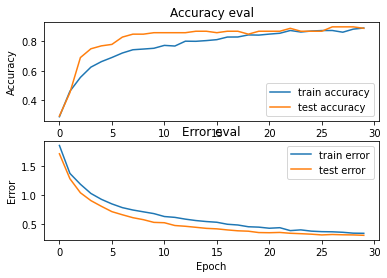

In [7]:
# plot accuracy/error for training and validation
plot_history(history)

In [8]:
X_to_predict = X_test[75]
y_to_predict = y_test[75]

# predict sample
predict(model, X_to_predict, y_to_predict)

Target: Final Data\Spicatto, Predicted label: ['Final Data\\Ricochet']


In [9]:
#Save the model if it is a good fit.
model.save("Original_Model.h5")